# Objective of the Project-To find which feature will impact sales

# Hypothesis Generation:
Null Hypothesis(H₀):The features of products and stores do not significantly influence the sales of products at BigMart stores.

Alternative Hypothesis (H₁): The features of products and stores significantly influence the sales of products at BigMart stores.

In [1487]:
#Import all relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Load train and test data

In [1415]:
train = pd.read_csv("D:\BigMartSales\Train.csv")
test = pd.read_csv("D:\BigMartSales\Test.csv")

# Display the first few rows of the training data
print("First few rows of the training data:")
print(train.head())

# Display the first few rows of the test data
print("\nFirst few rows of the test data:")
print(test.head())

First few rows of the training data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                     

# Data Structure and Content

In [1416]:
#shape
train.shape

(8523, 12)

In train dataset there are 8523 items with 12 features.

In [1417]:
#info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Here there are 7 Categorical features and 5 Numerical features.

In [1418]:
train.select_dtypes(include="number").columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [1419]:
#missing value
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 missing values in the Item_Weight feature which is numerical and 2410 missing values in the Outlet_Size feature which is Categorical feature.

In [1421]:
#Checking duplicates
train.duplicated().sum()

0

In [1422]:
#identifying garbage value
for i in train.select_dtypes(include="object").columns:
    print(train[i].value_counts())
    print("***"*10)

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
******************************
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
******************************
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
******************************
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928


# Exploratory Data Analysis - EDA

In [1423]:
#What type of Item have been made the most?
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Snack Foods'),
  Text(2, 0, 'Household'),
  Text(3, 0, 'Frozen Foods'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Canned'),
  Text(6, 0, 'Baking Goods'),
  Text(7, 0, 'Health and Hygiene'),
  Text(8, 0, 'Soft Drinks'),
  Text(9, 0, 'Meat'),
  Text(10, 0, 'Breads'),
  Text(11, 0, 'Hard Drinks'),
  Text(12, 0, 'Others'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Breakfast'),
  Text(15, 0, 'Seafood')])

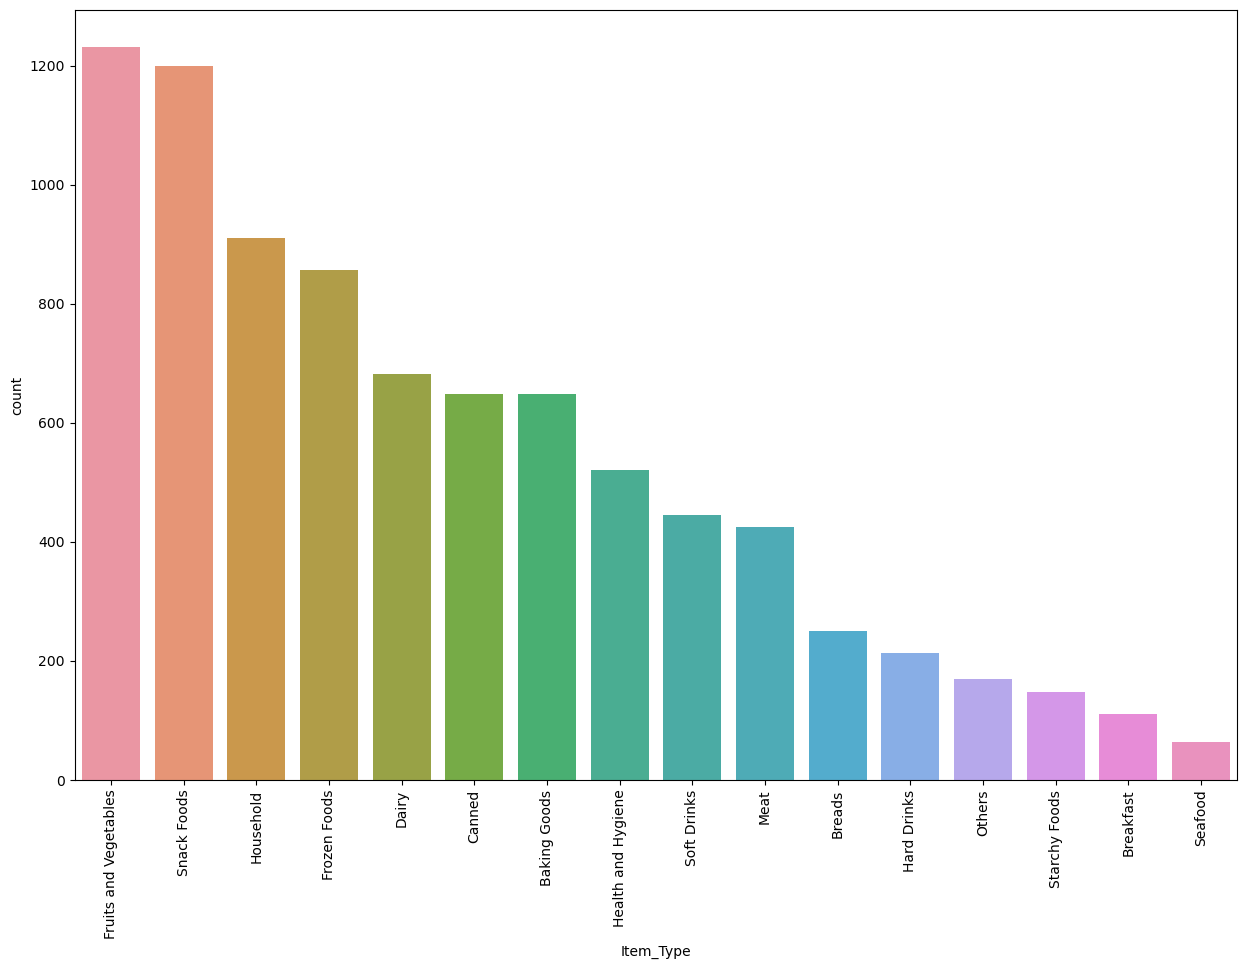

In [1424]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Item_Type", data=train, order = train['Item_Type'].value_counts().index)
plt.xticks(rotation=90)

# Most of the Sales are for Fruits and Vegetables.In Fruits and Vegetables section, there are 1232 and in Snack foods 1200 Sales.

In [1425]:
#Which item of Fat Content have been made the most?
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low Fat'),
  Text(1, 0, 'Regular'),
  Text(2, 0, 'LF'),
  Text(3, 0, 'reg'),
  Text(4, 0, 'low fat')])

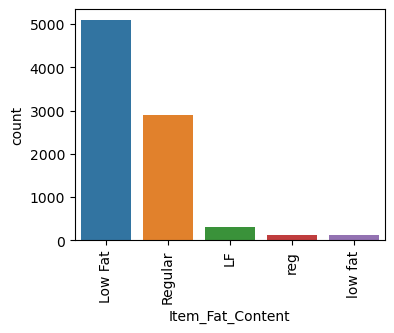

In [1369]:
plt.figure(figsize=(4, 3))
sns.countplot(x="Item_Fat_Content", data=train_df, order = train_df['Item_Fat_Content'].value_counts().index)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'Small'), Text(2, 0, 'High')])

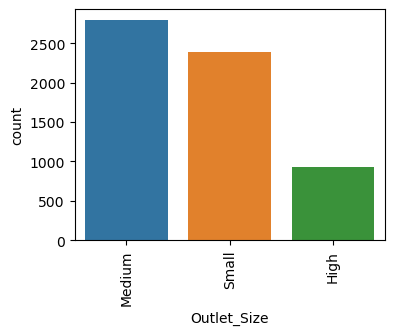

In [1426]:
plt.figure(figsize=(4, 3))
sns.countplot(x="Outlet_Size", data=train, order = train['Outlet_Size'].value_counts().index)
plt.xticks(rotation=90)

# Here it shows the item with Low Fat content have been made the most

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1987'),
  Text(2, 0, '1997'),
  Text(3, 0, '1999'),
  Text(4, 0, '2004'),
  Text(5, 0, '2002'),
  Text(6, 0, '2009'),
  Text(7, 0, '2007'),
  Text(8, 0, '1998')])

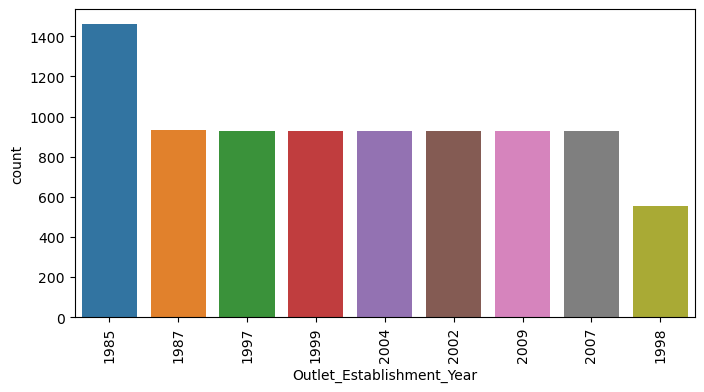

In [1427]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Outlet_Establishment_Year", data=train, order = train.groupby(by=['Outlet_Establishment_Year'])['Item_Outlet_Sales'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

# This counterplot shows that the most Outlet Sales was on 1985.And during hte year 1987 to 2007 , there is no change in Sales and in 1998,the sales was decreased.

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 3'), Text(1, 0, 'Tier 2'), Text(2, 0, 'Tier 1')])

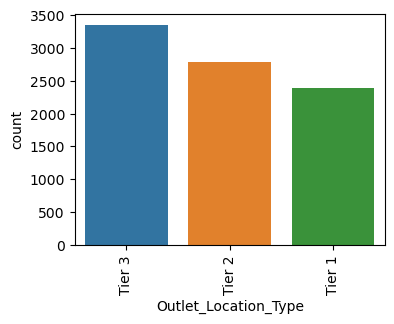

In [1428]:
plt.figure(figsize=(4, 3))
sns.countplot(x='Outlet_Location_Type', data=train, order = train['Outlet_Location_Type'].value_counts().index)
plt.xticks(rotation=90)

# Top 5 years Sales

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1987'),
  Text(2, 0, '1999'),
  Text(3, 0, '1997'),
  Text(4, 0, '2004')])

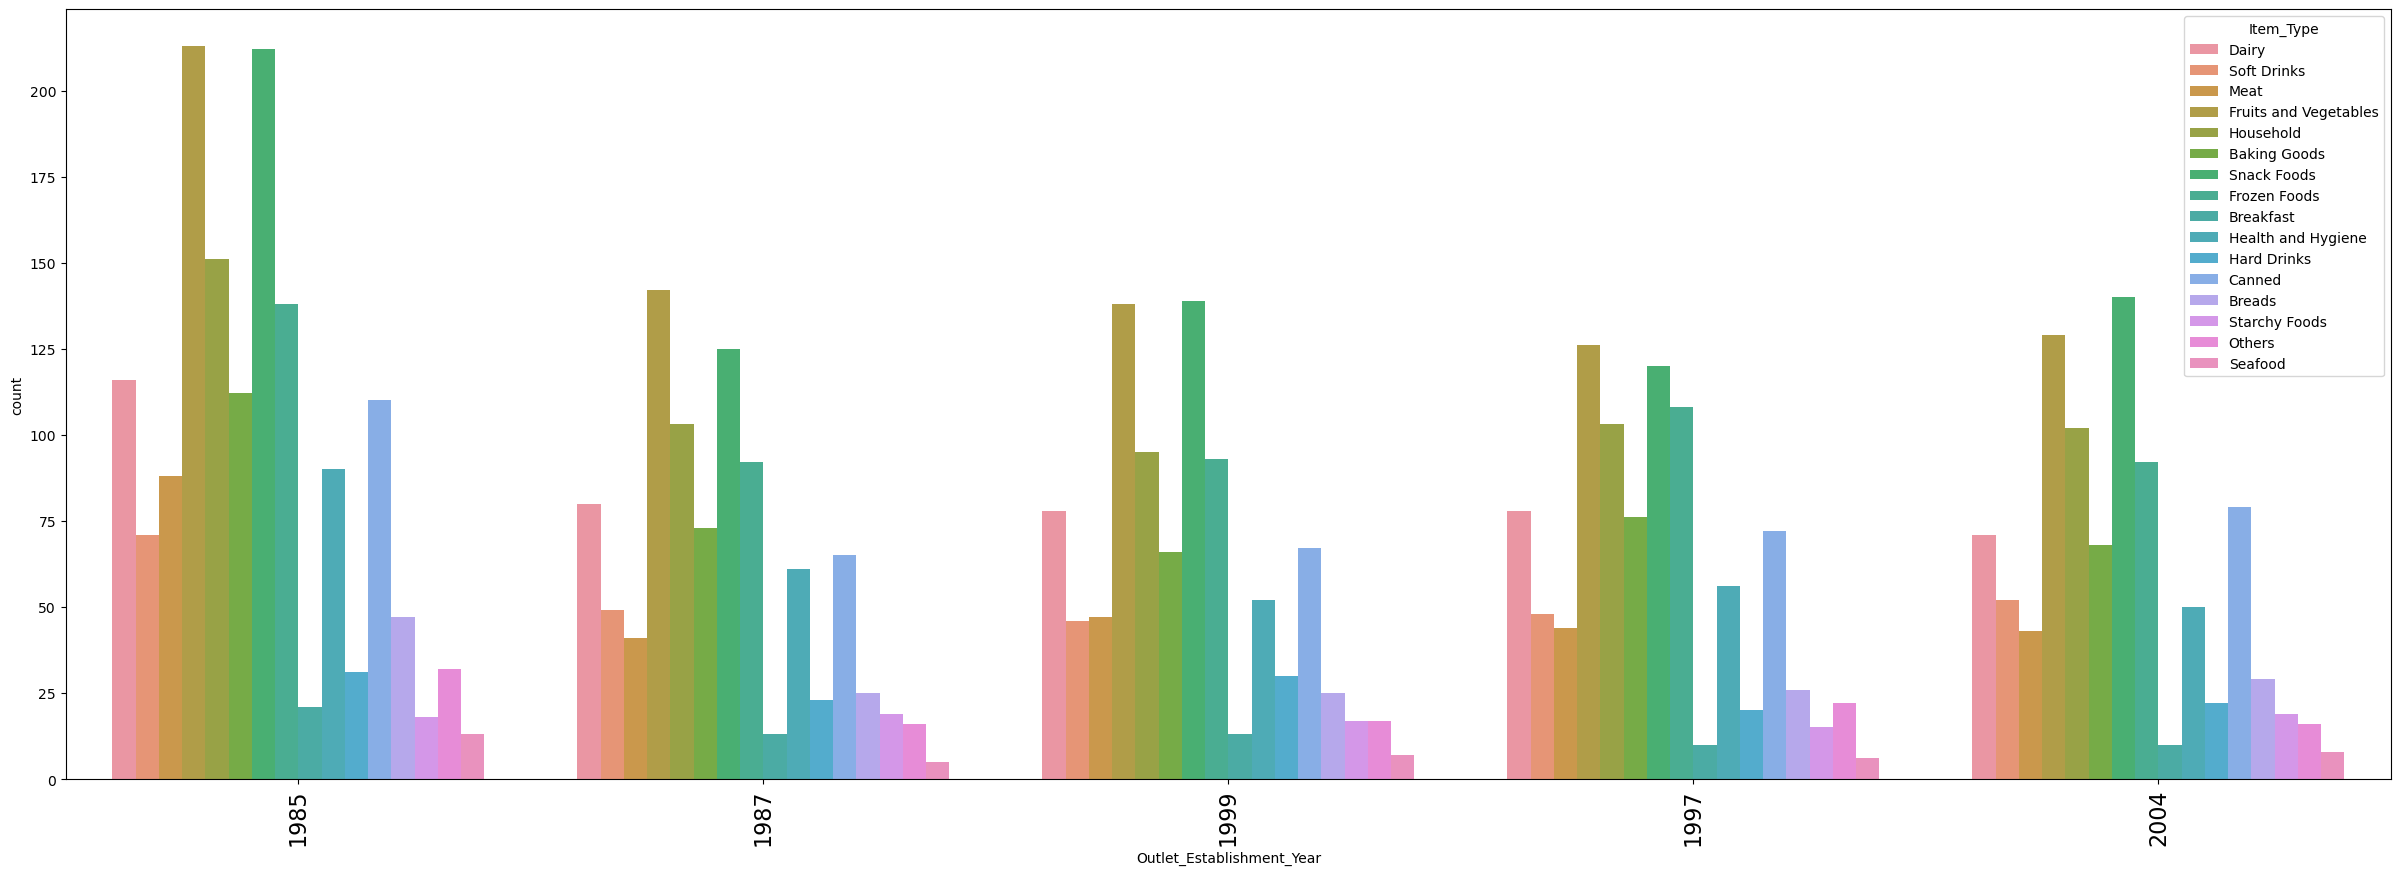

In [1429]:
#Top 5 years Sales by Item_Type
plt.figure(figsize=(30, 10))
sns.countplot(x="Outlet_Establishment_Year", data=train, hue='Item_Type', order=train.Outlet_Establishment_Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

# Univariate Analysis

In [1430]:
#Descriptive statistics 
train.describe()      #numerical data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1431]:
train.describe(include="object")  #categorical data

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


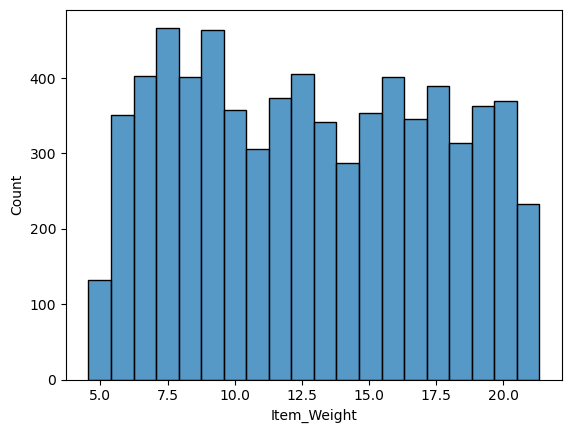

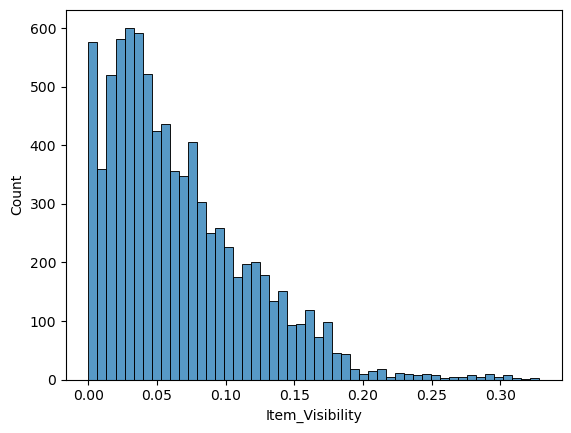

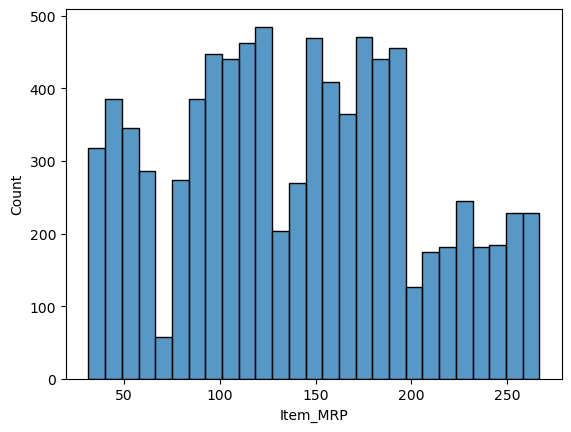

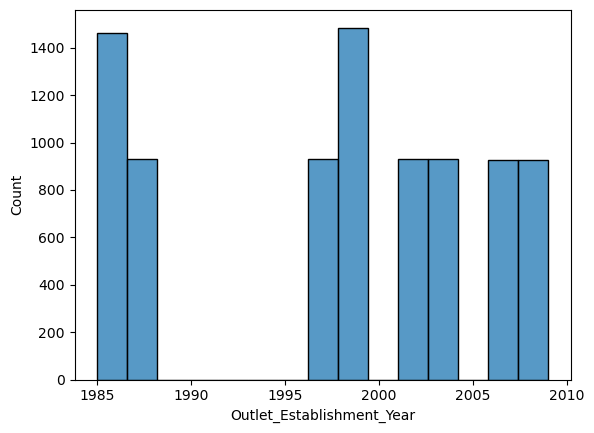

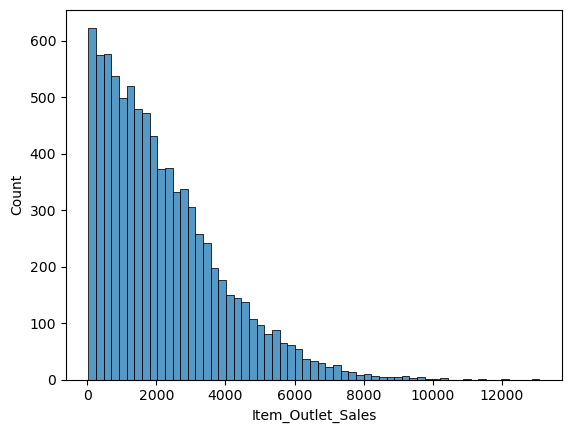

In [1432]:
#histogram of numerical variables
for i in train.select_dtypes(include="number").columns:
    sns.histplot(data=train,x=i)
    plt.show()

# From this Histogram, we can see that the features 'Item_Visibility' and 'Item_Outlet_Sales' are right skewed.And in the 'Outlet_Establishment_Year', there was no store establishment between 1990 and 1995.Also,the MRP of products are showing high between 150 and 200.Item_MRP clearly maximises the Outlet sales.And Item_Weight is varying from 5.0 to 20.0.

In [ ]:
#Boxplot toidentify outliers
for i in train.select_dtypes(include="number").columns:
    sns.boxplot(data=train,x=i)
    plt.show()

Boxplot shows that there are outliers in Item_Visibility and Item_Outlet_Sales.So we need to remove them.

# Bivariate Analysis

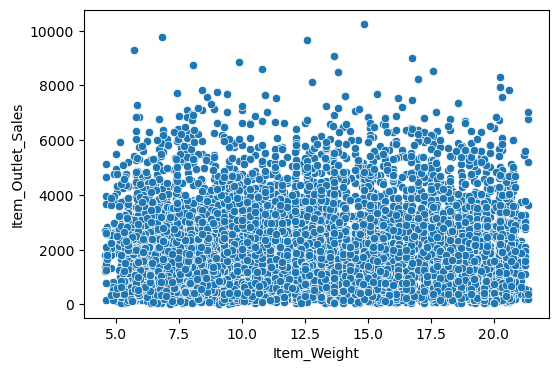

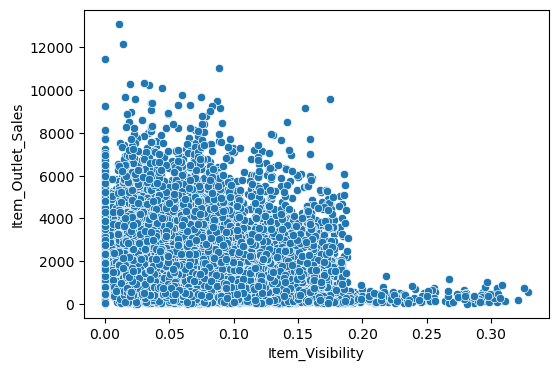

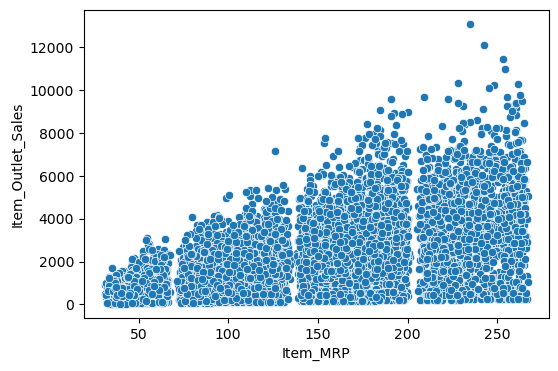

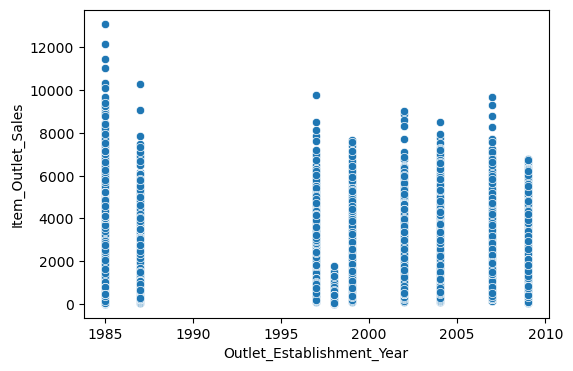

In [1434]:
#scatter plot to understandthe relationship(bivariate analysis)
for i in ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train,x=i,y='Item_Outlet_Sales')
    plt.show()


In [1435]:
#Correlation with heatmap to interpret the relation and multicollinearity
train.select_dtypes(include="number").corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

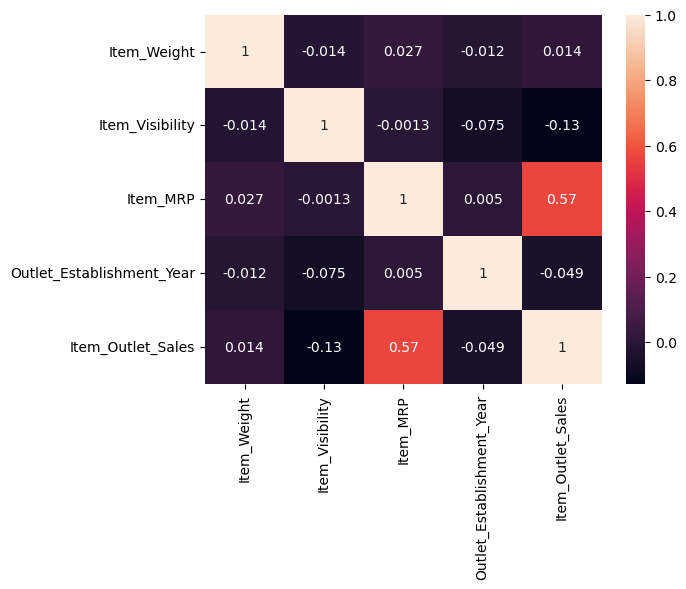

In [1436]:
sns.heatmap(train.select_dtypes(include="number").corr(),annot=True)

# All numericalcolumns are positively correlated and We can see there is a positive correlation between Item_MRP & Item_Outlet_Sales(target variable). So,Item_MRP results in positive Sales.
In addition, we see a negative correlation between Item_Outlet_Sales(target variable) & Outlet_Establishment_Year. 

# Missing Value Treatments-Feature Engineering

In [1437]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Here we can see that 2 features are having outliers i.e.,'Item_Weight' which is a numerical column having 2410 missing values and 'Outlet_Size' which is a categorical column with 2410 outliers.For 'Outlet_Size', we can use mode for filling the missing values and for 'Item_Weight',we can use mean for filling the missing values.

In [1438]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Similarly,in the test dat also there are missing values on the same column.So, we can remove missing values of both .

In [1439]:
train['Item_Weight'].fillna(int(train['Item_Weight'].mean()), inplace=True)
test['Item_Weight'].fillna(int(test['Item_Weight'].mean()), inplace=True)
train.isnull().sum()
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [1440]:
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0],inplace=True)
test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0],inplace=True)
train.isnull().sum()
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Outlier Treatments-Using IQR Method

In [1441]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw
    

In [1442]:
wisker(train['Item_Visibility'])

(-0.07440424500000001, 0.195979015)

In [1443]:
wisker(test['Item_Visibility'])

(-0.072576747, 0.193086245)

In [1444]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [1445]:
for i in ['Item_Visibility']:
    lw,uw=wisker(train[i])
    train[i]=np.where(train[i]<lw,lw,train[i])
    train[i]=np.where(train[i]>uw,uw,train[i])
for i in ['Item_Visibility']:
    lw,uw=wisker(test[i])
    test[i]=np.where(test[i]<lw,lw,test[i])
    test[i]=np.where(test[i]>uw,uw,test[i])

Upper limit:  0.193086245
Lower limit:  -0.072576747


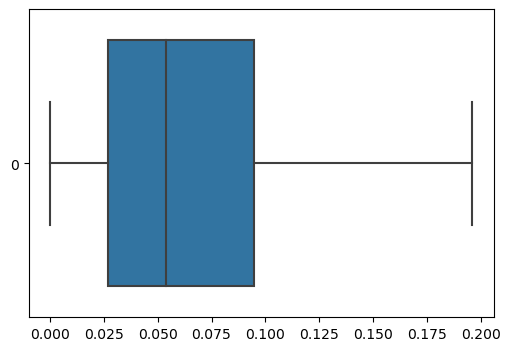

In [1446]:
print("Upper limit: ", uw)
print("Lower limit: ", lw)
for i in ['Item_Visibility']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(train[i],orient='h')
    plt.show

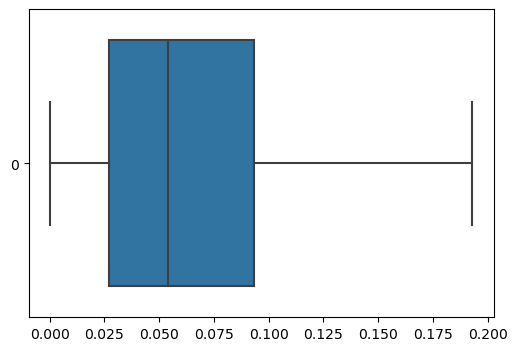

In [1447]:
for i in ['Item_Visibility']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(test[i],orient='h')
    plt.show

In [1448]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [1449]:
wisker(train['Item_Outlet_Sales'])

(-2566.3261, 6501.8699)

In [1450]:
for i in ['Item_Outlet_Sales']:
    lw,uw=wisker(train_df[i])
    train[i]=np.where(train[i]<lw,lw,train[i])
    train[i]=np.where(train[i]>uw,uw,train[i])

Upper limit:  6501.8699
Lower limit:  -2566.3261


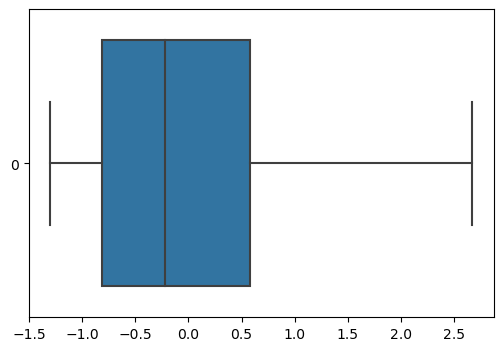

In [1451]:
print("Upper limit: ", uw)
print("Lower limit: ", lw)
for i in ['Item_Outlet_Sales']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[i],orient='h')
    plt.show

In [1457]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1456]:
test.select_dtypes(include="object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [1458]:
train.select_dtypes(include="object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# Lable Encoding

In [1411]:
from sklearn.preprocessing import LabelEncoder

In [1459]:
le = LabelEncoder()
cat_col = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_col:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])
train.shape    

(8523, 12)

In [1460]:
test.shape  

(5681, 11)

In [1461]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Data Preprocessing

In [1462]:
# Let's drop useless columns
train.drop(labels=['Item_Identifier'], axis=1, inplace=True)
test.drop(labels=['Item_Identifier'],  axis=1, inplace=True)

In [260]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [1464]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1
3,19.20,2,0.000000,6,182.0950,0,1998,1,2,0
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1


In [1465]:
X.shape

(8523, 10)

In [1466]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [1471]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
columns_to_scale = ['Item_Weight', 'Item_MRP']
X_train= sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
test=sc.fit_transform(test)

In [1472]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.804682,1,0.016047,4,1.747454,9,1999,1,0,1,3735.1380
1,-1.602184,2,0.019278,14,-1.489023,3,2009,1,2,2,443.4228
2,1.130087,1,0.016760,10,0.010040,9,1999,1,0,1,2097.2700
3,1.531198,2,0.000000,6,0.660050,0,1998,1,2,0,732.3800
4,-0.891982,1,0.000000,9,-1.399220,1,1987,0,2,1,994.7052


# Model Building

In [921]:
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
#from sklearn.metrics import accuracy_score

In [1473]:
# Spliting the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [1474]:
X_test.shape

(1705, 10)

In [1475]:
X_train.shape

(6818, 10)

In [1476]:
y_test.shape

(1705,)

In [1477]:
y_train.shape

(6818,)

# Regression model bulding using LinearRegression

In [1478]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1479]:
model = LinearRegression()

In [1480]:
model.fit(X_train, y_train)

LinearRegression()

In [1484]:
# Predict the target variable for the test set
y_pred = model.predict(X_test)
y_pred

array([2469.86901966, 2410.16550808, 1828.36783599, ..., 3746.21634221,
       -419.92891516, 5148.21940005])

In [1485]:
print('Training score  : {}'.format(model.score(X_train, y_train)))
print('Test score      : {}'.format(model.score(X_test, y_test)))

Training score  : 0.5203521353408543
Test score      : 0.5173992881676324


In [1488]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse =math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [1490]:
print(f"Mean Squared Error: {mse}")
print(f"RMSE : {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1309832.9727782058
RMSE : 1144.4793457193562
R^2 Score: 0.5173992881676324


The LinearRegression model gives a training accuracy and a test accuracy of about 52%. We also get an RMSE of about 1144.47 and a R2 score of 0.517.

In [249]:
steps = [('scaler', StandardScaler()),
    ('poly',   PolynomialFeatures(degree=2)),
    ('model',  LinearRegression())]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(X_train, y_train)

print('Training score  : {}'.format(lin_reg_pipeline.score(X_train, y_train)))
print('Test score      : {}'.format(lin_reg_pipeline.score(X_test, y_test)))

Training score  : 0.6093674528867982
Test score      : 0.5949584558469865


# Random Forest Regressor

Regularized linear regression helps prevent overfitting by adding a penalty term to the linear regression cost function. The two main types of regularized linear regression are Ridge Regression (L2 regularization) and Lasso Regression (L1 regularization).

In [1495]:
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor()

In [1496]:
# Predictions for XGBoost on the test data
rand_forest_predictions = model1.predict(X_test)
print('Training score  : {}'.format(model1.score(X_train, y_train)))
print('Test score      : {}'.format(model1.score(X_test, y_test)))

Training score  : 0.9410844389612101
Test score      : 0.5565989338248171


In [1507]:
mse1 = mean_squared_error(y_test , rand_forest_predictions)
rmse1 = math.sqrt(mse1)
random_r2 = r2_score(y_test, rand_forest_predictions)

print(f"RMSE : {rmse1}")
print(f"R^2 Score :{random_r2}")

RMSE : 1097.0144466754864
R^2 Score :0.5565989338248171


Here R2 score is 0.556.

# XGBoost Regressor

In [1499]:
pip install xgboost

In [1500]:
import xgboost as xgb

In [1501]:
from xgboost import XGBRegressor

In [1502]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1298]:
# Predictions for XGBoost on the test data
xgb_predictions = xgb_model.predict(X_test)

In [1504]:
print('Training score  : {}'.format(xgb_model.score(X_train, y_train)))
print('Test score      : {}'.format(xgb_model.score(X_test, y_test)))

Training score  : 0.8661553622360009
Test score      : 0.49003003440543325


In [1511]:
xgb_mse = mean_squared_error(y_test , xgb_predictions)
xgb_rmse = math.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f'RMSE:{xgb_rmse}')
print(f"R^2 Score :{xgb_r2}")

RMSE:1087.3500038895145
R^2 Score :0.5643770416382783


Here the R2 score is 0.564.

# Gradient Boosting Regressor

In [1525]:
from sklearn.ensemble import GradientBoostingRegressor

In [1526]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
# Predictions for GradientBoost on the test data
gb_predictions = gb.predict(X_test)
print('Training score  : {}'.format(gb.score(X_train, y_train)))
print('Test score      : {}'.format(gb.score(X_test, y_test)))

Training score  : 0.6453558624998259
Test score      : 0.5972701215594021


In [1527]:
gb_mse = mean_squared_error(y_test , rand_forest_predictions)
gb_rmse = math.sqrt(gb_mse)
gb_r2 = r2_score(y_test,gb_predictions)

print(f"RMSE : {gb_rmse}")
print(f"R^2 Score :{gb_r2}")

RMSE : 1097.0144466754864
R^2 Score :0.5972701215594021


Here the training score is 65% and test score is 60%

Here the R2 score is 0.597.

In [255]:
import joblib

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
filename = 'gradient_boosting_regressor_model.sav'
joblib.dump(model, filename)

print("Model saved successfully.")

Model saved successfully.


In [256]:
loaded_model = joblib.load(filename)

In [261]:
# Make predictions on the new test dataset
predictions = loaded_model.predict(test)

# Print the predictions
print(predictions)

[-440.18546056 -641.47320326   96.7534542  ...   96.7534542  -498.63138641
   96.7534542 ]


# Here the alternative hypothesis (H₁) is true,which means that the features of products and stores significantly influence sales at BigMart stores. Among the tested models, the GradientBoostingRegressor gives the best result, with an R-squared value of 0.597 on the testing data.